In [1]:
import geopandas

# load 2016 data

In [2]:
precincts_2016 = geopandas.read_file('./data_raw/fl_2016/fl_2016.shp', index_col="countypct")
precincts_2016 = precincts_2016.query('county == "ORA"')
precincts_2016 = precincts_2016.set_index("countypct")

pres_columns = [col for col in precincts_2016.columns if 'G16PRE' in col]
cols_to_keep = pres_columns + ["geometry"]
precincts_2016 = precincts_2016[cols_to_keep]

precincts_2016.loc[:, "votes_all"] = precincts_2016[pres_columns].sum(axis=1)
precincts_2016.rename(columns={"G16PRERTru": "votes_rep", "G16PREDCli": "votes_dem"}, inplace=True)
precincts_2016.loc[:, "votes_oth"] = precincts_2016["votes_all"] - precincts_2016["votes_dem"] - precincts_2016["votes_rep"]

cols_to_keep = ["votes_dem", "votes_rep", "votes_oth", "votes_all", "geometry"]
precincts_2016 = precincts_2016[cols_to_keep]

precincts_2016 = precincts_2016.drop("ORA631")
precincts_2016 = precincts_2016[precincts_2016["votes_all"] > 0]

precincts_2016.loc[:, "frac_dem"] = precincts_2016["votes_dem"] / precincts_2016["votes_all"]
precincts_2016.loc[:, "frac_rep"] = precincts_2016["votes_rep"] / precincts_2016["votes_all"]
precincts_2016.loc[:, "frac_oth"] = precincts_2016["votes_oth"] / precincts_2016["votes_all"]
precincts_2016.loc[:, "frac_twoway_dem"] = precincts_2016["votes_dem"] / precincts_2016[["votes_dem", "votes_rep"]].sum(axis=1)
precincts_2016.loc[:, "frac_twoway_rep"] = precincts_2016["votes_rep"] / precincts_2016[["votes_dem", "votes_rep"]].sum(axis=1)
precincts_2016.loc[:, "margin_votes_dem"] = precincts_2016["votes_dem"] - precincts_2016["votes_rep"]
precincts_2016.loc[:, "margin_frac_dem"] = precincts_2016["frac_dem"] - precincts_2016["frac_rep"]
precincts_2016.loc[:, "margin_frac_twoway_dem"] = precincts_2016["frac_twoway_dem"] - precincts_2016["frac_twoway_rep"]
precincts_2016.loc[:, "margin_votes_dem_abs"] = precincts_2016["margin_votes_dem"].abs()
precincts_2016.loc[:, "margin_votes_dem_is_positive"] = precincts_2016["margin_votes_dem"] > 0

precincts_2016.loc[:, "centroid"] = precincts_2016["geometry"].centroid.to_crs(epsg=4326)

print("n rows:", len(precincts_2016))
precincts_2016

n rows: 246


,votes_dem,votes_rep,votes_oth,votes_all,geometry,frac_dem,frac_rep,frac_oth,frac_twoway_dem,frac_twoway_rep,margin_votes_dem,margin_frac_dem,margin_frac_twoway_dem,margin_votes_dem_abs,margin_votes_dem_is_positive,centroid
countypct,,,,,,,,,,,,,,,,
ORA101,1995,1054,118,3167,"POLYGON Z ((504909.204 1523375.895 0.000, 5049...",0.629934,0.332807,0.037259,0.654313,0.345687,941,0.297127,0.308626,941,True,POINT (-81.48674 28.52315)
ORA102,1174,794,97,2065,"POLYGON Z ((499427.900 1523225.458 0.000, 4994...",0.568523,0.384504,0.046973,0.596545,0.403455,380,0.184019,0.193089,380,True,POINT (-81.49669 28.53018)
ORA103,978,850,89,1917,"POLYGON Z ((485063.981 1522998.231 0.000, 4849...",0.510172,0.443401,0.046427,0.535011,0.464989,128,0.066771,0.070022,128,True,POINT (-81.53799 28.53163)
ORA104,1651,1234,126,3011,"POLYGON Z ((497127.251 1529739.702 0.000, 4971...",0.548323,0.409831,0.041847,0.572270,0.427730,417,0.138492,0.144541,417,True,POINT (-81.52151 28.54159)
ORA105,1287,405,60,1752,"POLYGON Z ((477486.115 1540281.324 0.000, 4774...",0.734589,0.231164,0.034247,0.760638,0.239362,882,0.503425,0.521277,882,True,POINT (-81.57041 28.55752)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ORA629,1408,98,29,1535,"POLYGON Z ((533106.241 1527496.129 0.000, 5330...",0.917264,0.063844,0.018893,0.934927,0.065073,1310,0.853420,0.869854,1310,True,POINT (-81.39859 28.53067)
ORA630,1064,328,53,1445,"POLYGON Z ((535312.974 1519374.074 0.000, 5352...",0.736332,0.226990,0.036678,0.764368,0.235632,736,0.509343,0.528736,736,True,POINT (-81.38945 28.51817)
ORA632,2002,460,65,2527,"POLYGON Z ((528697.934 1513296.086 0.000, 5286...",0.792244,0.182034,0.025722,0.813160,0.186840,1542,0.610210,0.626320,1542,True,POINT (-81.41386 28.49938)


In [3]:
precincts_2016[["centroid", "margin_frac_twoway_dem"]].head()

,centroid,margin_frac_twoway_dem
countypct,,
ORA101,POINT (-81.48674 28.52315),0.308626
ORA102,POINT (-81.49669 28.53018),0.193089
ORA103,POINT (-81.53799 28.53163),0.070022
ORA104,POINT (-81.52151 28.54159),0.144541
ORA105,POINT (-81.57041 28.55752),0.521277


<AxesSubplot:>

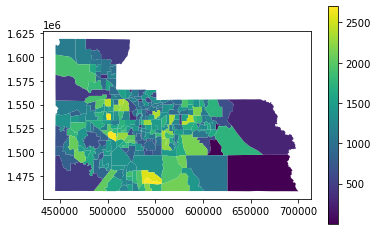

In [4]:
precincts_2016.plot(column='votes_dem', legend=True)

<AxesSubplot:>

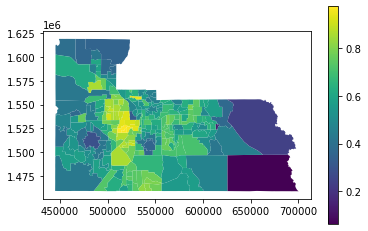

In [5]:
precincts_2016.plot(column='frac_twoway_dem', legend=True)

# load 2020 data

In [6]:
import pandas as pd

In [7]:
precincts_2020 = pd.read_csv('./data_processed/orange_2020_from_pdf.csv', index_col='countypct')

columns = precincts_2020.columns
print(columns)
candidates = [col for col in columns if not ' VOTES' in col]
print(candidates)
precincts_2020.loc[:, "votes_all"] = precincts_2020[candidates].sum(axis=1) 

precincts_2020.rename(columns={"Donald J. Trump": "votes_rep", "Joseph R. Biden": "votes_dem"}, inplace=True)

# pasted...
precincts_2020.loc[:, "votes_oth"] = precincts_2020["votes_all"] - precincts_2020["votes_dem"] - precincts_2020["votes_rep"]

cols_to_keep = ["votes_dem", "votes_rep", "votes_oth", "votes_all"]
precincts_2020 = precincts_2020[cols_to_keep]

precincts_2020 = precincts_2020.drop("ORA631")
precincts_2020 = precincts_2020[precincts_2020["votes_all"] > 0]

precincts_2020.loc[:, "frac_dem"] = precincts_2020["votes_dem"] / precincts_2020["votes_all"]
precincts_2020.loc[:, "frac_rep"] = precincts_2020["votes_rep"] / precincts_2020["votes_all"]
precincts_2020.loc[:, "frac_oth"] = precincts_2020["votes_oth"] / precincts_2020["votes_all"]
precincts_2020.loc[:, "frac_twoway_dem"] = precincts_2020["votes_dem"] / precincts_2020[["votes_dem", "votes_rep"]].sum(axis=1)
precincts_2020.loc[:, "frac_twoway_rep"] = precincts_2020["votes_rep"] / precincts_2020[["votes_dem", "votes_rep"]].sum(axis=1)
precincts_2020.loc[:, "margin_votes_dem"] = precincts_2020["votes_dem"] - precincts_2020["votes_rep"]
precincts_2020.loc[:, "margin_frac_dem"] = precincts_2020["frac_dem"] - precincts_2020["frac_rep"]
precincts_2020.loc[:, "margin_frac_twoway_dem"] = precincts_2020["frac_twoway_dem"] - precincts_2020["frac_twoway_rep"]
precincts_2020.loc[:, "margin_votes_dem_abs"] = precincts_2020["margin_votes_dem"].abs()
precincts_2020.loc[:, "margin_votes_dem_is_positive"] = precincts_2020["margin_votes_dem"] > 0

print("n rows:", len(precincts_2020))
precincts_2020.head()

Index(['Don Blankenship', 'Donald J. Trump', 'Gloria La Riva', 'Howie Hawkins',
       'Jo Jorgensen', 'Joseph R. Biden', 'OVER VOTES',
       'Roque "Rocky" De La Fuente', 'UNDER VOTES', 'WRITE-IN'],
      dtype='object')
['Don Blankenship', 'Donald J. Trump', 'Gloria La Riva', 'Howie Hawkins', 'Jo Jorgensen', 'Joseph R. Biden', 'Roque "Rocky" De La Fuente', 'WRITE-IN']
n rows: 246


,votes_dem,votes_rep,votes_oth,votes_all,frac_dem,frac_rep,frac_oth,frac_twoway_dem,frac_twoway_rep,margin_votes_dem,margin_frac_dem,margin_frac_twoway_dem,margin_votes_dem_abs,margin_votes_dem_is_positive
countypct,,,,,,,,,,,,,,
ORA101,2169,1244,40,3453,0.628149,0.360266,0.011584,0.635511,0.364489,925,0.267883,0.271023,925,True
ORA102,1382,887,30,2299,0.601131,0.385820,0.013049,0.609079,0.390921,495,0.215311,0.218158,495,True
ORA103,1203,1004,32,2239,0.537293,0.448414,0.014292,0.545084,0.454916,199,0.088879,0.090168,199,True
ORA104,1994,1332,46,3372,0.591340,0.395018,0.013642,0.599519,0.400481,662,0.196323,0.199038,662,True
ORA105,1328,555,25,1908,0.696017,0.290881,0.013103,0.705258,0.294742,773,0.405136,0.410515,773,True


# merge 2016 and 2020 data

In [8]:
precincts_2016_2020 = precincts_2016.join(precincts_2020, rsuffix="_2020", lsuffix="_2016")

precincts_2016_2020.loc[:, "margin_frac_twoway_dem_shift"] = precincts_2016_2020["margin_frac_twoway_dem_2020"] - precincts_2016_2020["margin_frac_twoway_dem_2016"]
precincts_2016_2020.loc[:, "margin_votes_dem_shift"] = precincts_2016_2020["margin_votes_dem_2020"] - precincts_2016_2020["margin_votes_dem_2016"]
precincts_2016_2020.loc[:, "votes_all_shift"] = precincts_2016_2020["votes_all_2020"] - precincts_2016_2020["votes_all_2016"]
precincts_2016_2020.loc[:, "votes_all_ratio"] = precincts_2016_2020["votes_all_2020"] / precincts_2016_2020["votes_all_2016"]
precincts_2016_2020.loc[:, "votes_all_shift_percent"] = precincts_2016_2020["votes_all_ratio"] - 1
precincts_2016_2020.loc[:, "margin_votes_abs_shift"] = precincts_2016_2020["margin_votes_dem_shift"].abs()
precincts_2016_2020.loc[:, "margin_votes_dem_shift_is_positive"] = precincts_2016_2020["margin_votes_dem_shift"] > 0

precincts_2016_2020.loc[:, "centroid_lat"] = precincts_2016_2020.set_geometry('centroid').geometry.y
precincts_2016_2020.loc[:, "centroid_lon"] = precincts_2016_2020.set_geometry('centroid').geometry.x

precincts_2016_2020.head()

,votes_dem_2016,votes_rep_2016,votes_oth_2016,votes_all_2016,geometry,frac_dem_2016,frac_rep_2016,frac_oth_2016,frac_twoway_dem_2016,frac_twoway_rep_2016,...,margin_votes_dem_is_positive_2020,margin_frac_twoway_dem_shift,margin_votes_dem_shift,votes_all_shift,votes_all_ratio,votes_all_shift_percent,margin_votes_abs_shift,margin_votes_dem_shift_is_positive,centroid_lat,centroid_lon
countypct,,,,,,,,,,,,,,,,,,,,,
ORA101,1995,1054,118,3167,"POLYGON Z ((504909.204 1523375.895 0.000, 5049...",0.629934,0.332807,0.037259,0.654313,0.345687,...,True,-0.037603,-16,286,1.090306,0.090306,16,False,28.523150,-81.486737
ORA102,1174,794,97,2065,"POLYGON Z ((499427.900 1523225.458 0.000, 4994...",0.568523,0.384504,0.046973,0.596545,0.403455,...,True,0.025068,115,234,1.113317,0.113317,115,True,28.530180,-81.496691
ORA103,978,850,89,1917,"POLYGON Z ((485063.981 1522998.231 0.000, 4849...",0.510172,0.443401,0.046427,0.535011,0.464989,...,True,0.020146,71,322,1.167971,0.167971,71,True,28.531627,-81.537992
ORA104,1651,1234,126,3011,"POLYGON Z ((497127.251 1529739.702 0.000, 4971...",0.548323,0.409831,0.041847,0.572270,0.427730,...,True,0.054497,245,361,1.119894,0.119894,245,True,28.541592,-81.521506
ORA105,1287,405,60,1752,"POLYGON Z ((477486.115 1540281.324 0.000, 4774...",0.734589,0.231164,0.034247,0.760638,0.239362,...,True,-0.110761,-109,156,1.089041,0.089041,109,False,28.557515,-81.570415


In [9]:
precincts_2016_2020[
    ["centroid", "votes_all_2020", "margin_votes_dem_2020", "margin_votes_dem_shift", "votes_all_shift_percent", "margin_frac_twoway_dem_shift"]
].sort_values("margin_votes_dem_shift", ascending=True).head()

,centroid,votes_all_2020,margin_votes_dem_2020,margin_votes_dem_shift,votes_all_shift_percent,margin_frac_twoway_dem_shift
countypct,,,,,,
ORA322,POINT (-81.30259 28.49042),3005,772,-748,-0.006612,-0.260420
ORA428,POINT (-81.37263 28.35616),2280,834,-525,0.057024,-0.282203
ORA318,POINT (-81.27783 28.49268),2336,552,-523,0.045658,-0.263760
ORA427,POINT (-81.34363 28.37416),4080,1496,-508,0.161731,-0.220523
ORA538,POINT (-81.19716 28.60144),807,400,-500,-0.590771,0.012170


In [10]:
print("2016:", precincts_2016_2020["votes_dem_2016"].sum() / precincts_2016_2020[["votes_dem_2016", "votes_rep_2016"]].sum().sum())
print("2020:", precincts_2016_2020["votes_dem_2020"].sum() / precincts_2016_2020[["votes_dem_2020", "votes_rep_2020"]].sum().sum())

2016: 0.6282336451445809
2020: 0.6167886632238957


In [11]:
precincts_2016_2020.loc["ORA522"]

votes_dem_2016                                                                     1032
votes_rep_2016                                                                     1160
votes_oth_2016                                                                      119
votes_all_2016                                                                     2311
geometry                              POLYGON Z ((551972.2350247928 1543330.26108185...
frac_dem_2016                                                                   0.44656
frac_rep_2016                                                                  0.501947
frac_oth_2016                                                                 0.0514929
frac_twoway_dem_2016                                                           0.470803
frac_twoway_rep_2016                                                           0.529197
margin_votes_dem_2016                                                              -128
margin_frac_dem_2016            

# make plotly plots

In [12]:
import plotly.graph_objects as go
import plotly.express as px

MAPBOX_ACCESSTOKEN = 'pk.eyJ1IjoiZ3Jpc2FpdGlzIiwiYSI6ImNraDhnN3g2bzAyMWkycXIxamR0NXJscmgifQ.vyRCvByr3xNwonFcVco-HA'
# px.set_mapbox_access_token(MAPBOX_ACCESSTOKEN)

In [13]:
colorscale_margin = [
    (0, "rgb(100, 0, 0)"),
    (0.25, "rgb(255, 0, 0)"),
    (0.45, "rgb(255, 220, 220)"),
    (0.5, "rgb(255, 220, 255)"),
    (0.55, "rgb(220, 220, 255)"),
    (0.75, "rgb(0, 0, 255)"),
    (1, "rgb(0, 0, 100)"),
]

colorscale_shift = [
    (0, "black"),
    (0.25, "red"),
    (0.5, "white"),
    (0.75, "blue"),
    (1, "black"),
]


In [14]:
loc_orange_midpoint = {"lat": 28.571904, "lon": -81.267411}
loc_orl_airport = {"lat": 28.545556, "lon": -81.333056}

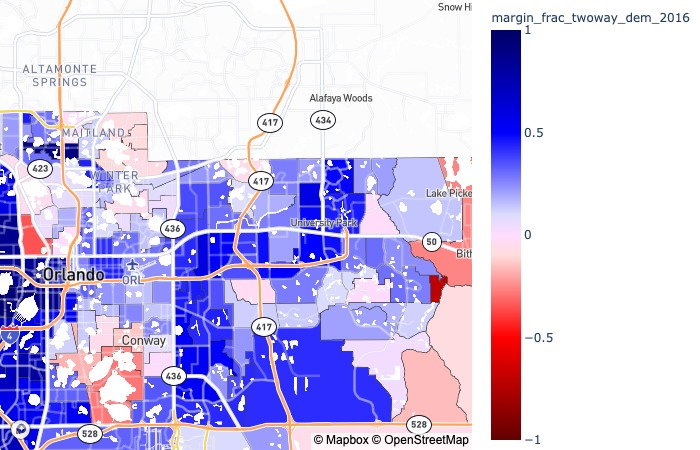

In [15]:
fig = px.choropleth_mapbox(
    precincts_2016_2020,
    precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    color='margin_frac_twoway_dem_2016',
    hover_name=precincts_2016_2020.index,
    hover_data=[
#         'votes_all_2016',
#         'votes_dem_2016',
#         'votes_rep_2016',
        'frac_twoway_dem_2016',
#         'frac_twoway_rep_2016',
#         'votes_all_2020',
#         'votes_dem_2020',
#         'votes_rep_2020',
        'frac_twoway_dem_2020',
#         'frac_twoway_rep_2020',
    ],
    color_continuous_scale=colorscale_margin,
#     opacity=,
    range_color=[-1, 1],
)

fig = fig.update_traces(
    marker_line_width=0.4,
    below='water',
)

fig.update_layout(
    mapbox=dict(
        style="mapbox://styles/grisaitis/ckhdmzzfl015419qr8h5n9dpm",
#         style='streets',
        accesstoken=MAPBOX_ACCESSTOKEN,
        zoom=10,
        center = loc_orange_midpoint,
    ),
    autosize=True,
    height=700,
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show(renderer='jpg')

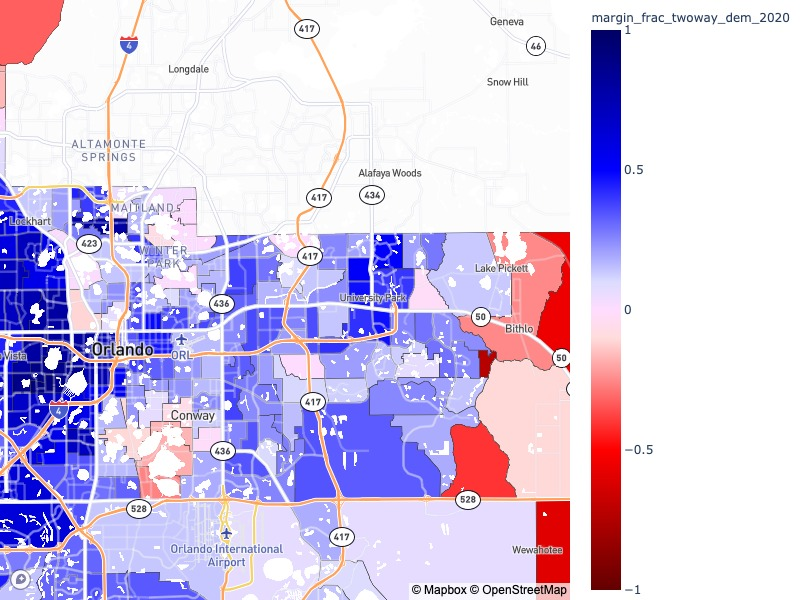

In [16]:
fig = px.choropleth_mapbox(
    precincts_2016_2020,
    precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    color='margin_frac_twoway_dem_2020',
    hover_name=precincts_2016_2020.index,
    hover_data=[
#         'votes_all_2016',
#         'votes_dem_2016',
#         'votes_rep_2016',
        'frac_twoway_dem_2016',
#         'frac_twoway_rep_2016',
#         'votes_all_2020',
#         'votes_dem_2020',
#         'votes_rep_2020',
        'frac_twoway_dem_2020',
#         'frac_twoway_rep_2020',
    ],
    color_continuous_scale=colorscale_margin,
#     opacity=,
    range_color=[-1, 1],
)

fig = fig.update_traces(
    marker_line_width=0.4,
    below='water',
)

fig.update_layout(
    mapbox=dict(
        style="mapbox://styles/grisaitis/ckhdmzzfl015419qr8h5n9dpm",
#         style='streets',
        accesstoken=MAPBOX_ACCESSTOKEN,
        zoom=10,
        center = loc_orange_midpoint,
    ),
    autosize=True,
    height=700,
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show(renderer='jpg', width=800, height=600)

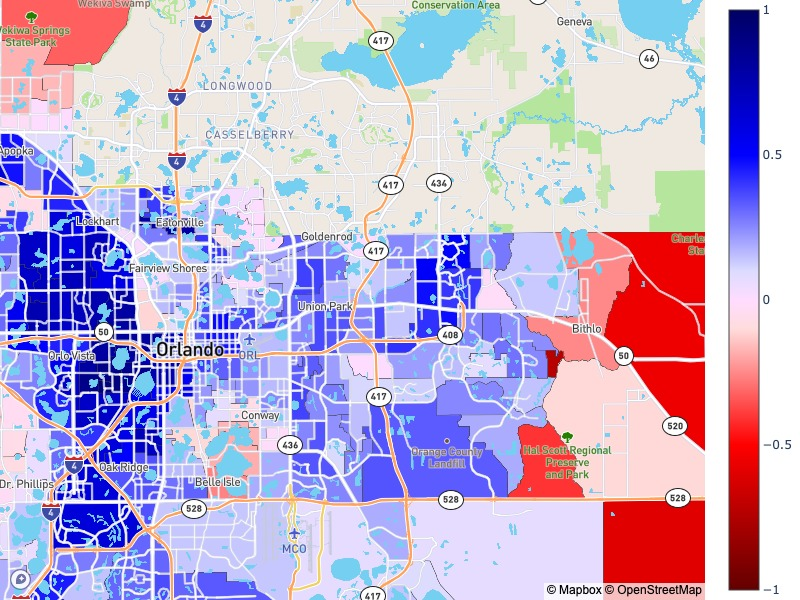

In [17]:
choropleth = go.Choroplethmapbox(
    geojson=precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    z=precincts_2016_2020["margin_frac_twoway_dem_2020"],
    zmin=-1,
    zmax=1,
    marker_line_width=0.2,
    colorscale=colorscale_margin,
    marker_opacity=1.0,
    below='water',
#     below='road-primary',
#     below='aeroway-polygon',
#     below='road-secondary-tertiary',
#     below='road-motorway-trunk',
)

fig = go.Figure([choropleth])

fig.update_layout(
#     mapbox_style='light',
    mapbox_style='streets',
#     mapbox_style='mapbox://styles/grisaitis/ckhdmzzfl015419qr8h5n9dpm',
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=10,
    mapbox_center=loc_orange_midpoint,
    autosize=True,
    height=700,
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show(renderer='jpg', width=800, height=600)

In [18]:
# fig.write_image('margin_frac_twoway_dem_2020.jpg', width=700, height=500, scale=10)

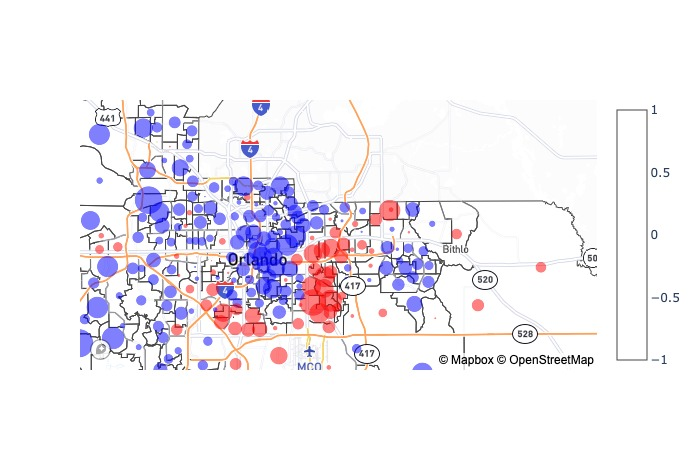

In [19]:
choropleth = go.Choroplethmapbox(
    geojson=precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    z=precincts_2016_2020["margin_frac_twoway_dem_2020"],
    zmin=-1,
    zmax=1,
    marker_line_width=1,
    colorscale=["white", "white"],
    marker_opacity=1,
#     below='water',
#     below='road-primary',
#     below='aeroway-polygon',
#     below='road-secondary-tertiary',
#     below='road-motorway-trunk',
#     showscale=False
)

scatter = go.Scattermapbox(
    lat=precincts_2016_2020.set_geometry('centroid').geometry.y,
    lon=precincts_2016_2020.set_geometry('centroid').geometry.x,
    mode="markers",
    marker_size=precincts_2016_2020["margin_votes_abs_shift"]*0.5,
    marker_color=precincts_2016_2020["margin_votes_dem_shift_is_positive"] * 1.0,
    text=precincts_2016_2020.index,
#     color_sequential_scale=["blue", "red"],
    below='',
    marker_sizemode='area',
    marker_colorscale=['red', 'blue'],
    marker_opacity=0.5
)

fig = go.Figure([choropleth, scatter])

fig.update_layout(
#     mapbox_style='light',
    mapbox_style='mapbox://styles/grisaitis/ckhdmzzfl015419qr8h5n9dpm',
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=9,
    mapbox_center=loc_orange_midpoint,
#     autosize=True,
#     height=700,
#     margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show(renderer='jpg')

In [20]:
# fig.write_image('margin_votes_dem_shift.jpg', width=700, height=500, scale=10)

In [21]:
'''
import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter
'''

'\nimport dash\nimport dash_core_components as dcc\nimport dash_html_components as html\n\napp = dash.Dash()\napp.layout = html.Div([\n    dcc.Graph(figure=fig)\n])\n\napp.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter\n'

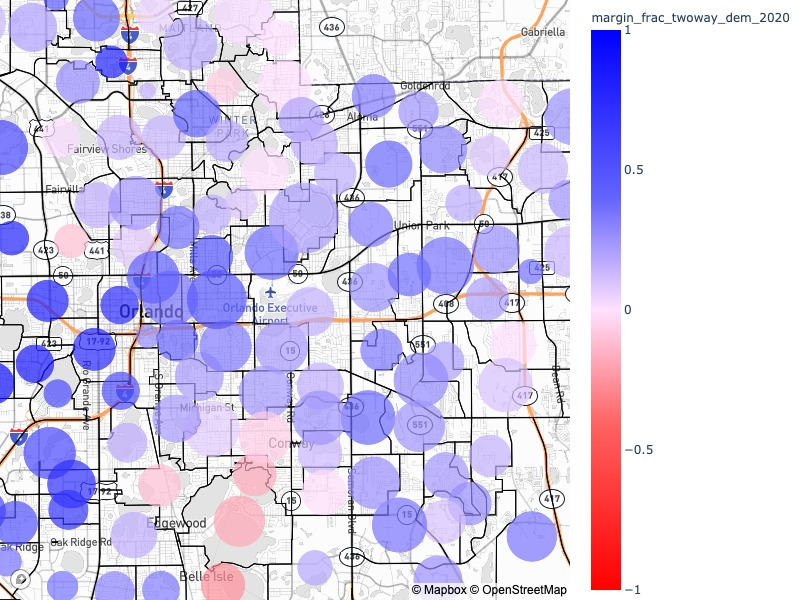

In [22]:
fig = px.scatter_mapbox(
    precincts_2016_2020,
    lat="centroid_lat",
    lon="centroid_lon",
    color="margin_frac_twoway_dem_2020",
    size="votes_all_2020",
    color_continuous_scale=[
        (0.0, "rgb(255, 0, 0)"),
        (0.3, "rgb(255, 100, 100)"),
        (0.5, "rgb(255, 225, 255)"),
        (0.7, "rgb(100, 100, 255)"),
        (1.0, "rgb(0, 0, 255)")],
    size_max=60,
    range_color=[-1, 1]
)

fig.update_layout(
    mapbox_style="mapbox://styles/grisaitis/ckhb6ai8509e719pcec3r5nh6",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=11,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},
    autosize=True,
    margin={"r":0,"t":0,"l":0,"b":0},
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "geojson",
        "source": precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
        "opacity": 1,
        "type": "line",
        "line": {"width": 1},
        "color": 'black'}],
)

fig.show(renderer='jpg', width=800, height=600)

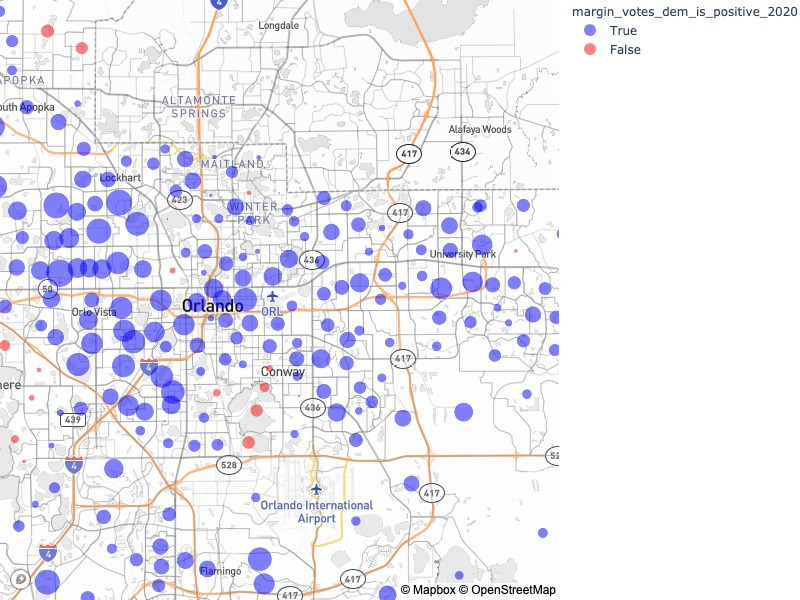

In [23]:
fig = px.scatter_mapbox(
    precincts_2016_2020,
    lat="centroid_lat",
    lon="centroid_lon",
    color="margin_votes_dem_is_positive_2020",
    size="margin_votes_dem_abs_2020",
    color_discrete_sequence=["blue", "red"],
    zoom=11,
    size_max=20,
    opacity=0.5,
)

fig.add_trace(px.choropleth_mapbox(
    precincts_2016_2020,
    precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    color_discrete_sequence=['white'],
    opacity=0.2,
).data[0])

fig.update_layout(
    mapbox_style="mapbox://styles/grisaitis/ckhb6ai8509e719pcec3r5nh6",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=10,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},
    autosize=True,
#     height=1000,
    margin={"r":0,"t":0,"l":0,"b":0},

)

fig.show(renderer='jpg', width=800, height=600)

In [24]:
# fig.write_image("./margin_2020.pdf", width=1500, height=1000)

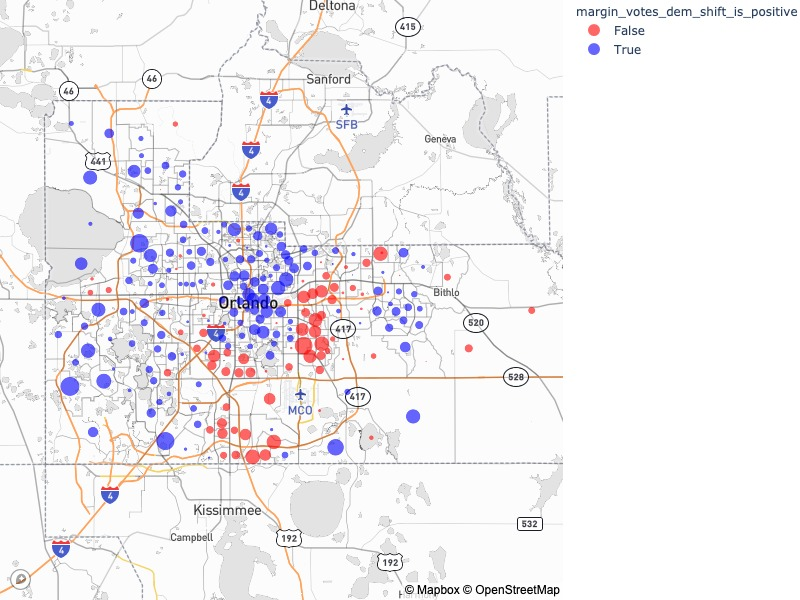

In [25]:
fig = px.scatter_mapbox(
    precincts_2016_2020,
    lat="centroid_lat",
    lon="centroid_lon",
    color="margin_votes_dem_shift_is_positive",
    size="margin_votes_abs_shift",
    color_discrete_sequence=["red", "blue"],
    zoom=11,
    size_max=14,
    opacity=0.6,
)

fig.add_trace(px.choropleth_mapbox(
    precincts_2016_2020,
    precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    color_discrete_sequence=['rgba(0, 0, 0, 0)'],
    opacity=.2,
).data[0])

fig.update_layout(
    mapbox_style="mapbox://styles/grisaitis/ckhb6ai8509e719pcec3r5nh6",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=9,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},
    autosize=True,
#     height=1000,
    margin={"r":0,"t":0,"l":0,"b":0},

)

fig.show(renderer='jpg', width=800, height=600)

# simple scatter of Dem two-way performance by precinct for 2016 vs 2020

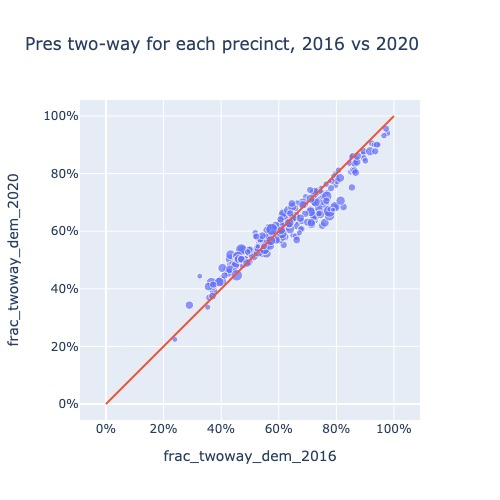

In [26]:
fig = px.scatter(
    precincts_2016_2020.reset_index(),
    x="frac_twoway_dem_2016",
    y="frac_twoway_dem_2020",
    size="votes_all_2020",
    hover_data=['countypct'],
    title="Pres two-way for each precinct, 2016 vs 2020",
    size_max=10,
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        showlegend=False
    )
)
fig.update_layout(
    height=1000,
    xaxis=dict(
        tickformat = ',.0%',
        range=[0, 1],
        nticks=10),
    yaxis=dict(
        scaleanchor="x",
        tickformat = ',.0%',
        nticks=10),
)

fig.show(renderer='jpg', width=500, height=500)

In [27]:
# fig.write_image('margin_frac_twoway_dem_scatter.jpg', width=640, height=640, scale=5)

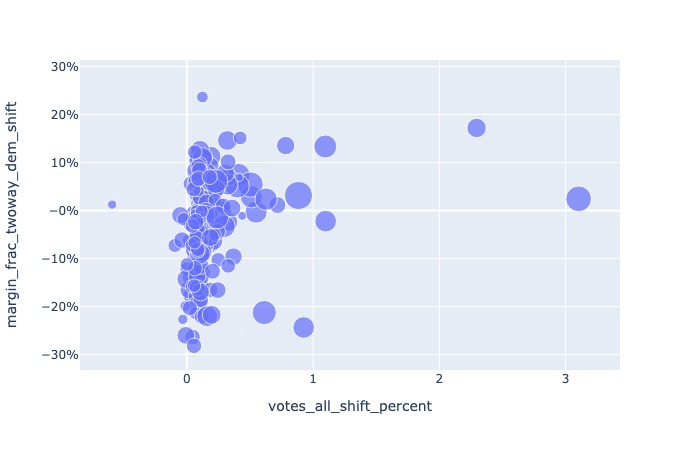

In [28]:
fig = px.scatter(
    precincts_2016_2020.reset_index(),
    x="votes_all_shift_percent",
    y="margin_frac_twoway_dem_shift",
    size='votes_all_2020',
    hover_data=['countypct', 'votes_dem_2016', 'votes_rep_2016', 'votes_dem_2020', 'votes_rep_2020', 'margin_votes_dem_shift']
)
fig.update_layout(height=1000, yaxis=dict(tickformat = ',.0%'))

fig.show(renderer='jpg')

In [29]:
precincts_2016_2020.loc["ORA140"]

votes_dem_2016                                                                      831
votes_rep_2016                                                                      619
votes_oth_2016                                                                       79
votes_all_2016                                                                     1529
geometry                              POLYGON Z ((469976.8980714711 1490335.56434401...
frac_dem_2016                                                                  0.543492
frac_rep_2016                                                                   0.40484
frac_oth_2016                                                                 0.0516678
frac_twoway_dem_2016                                                           0.573103
frac_twoway_rep_2016                                                           0.426897
margin_votes_dem_2016                                                               212
margin_frac_dem_2016            

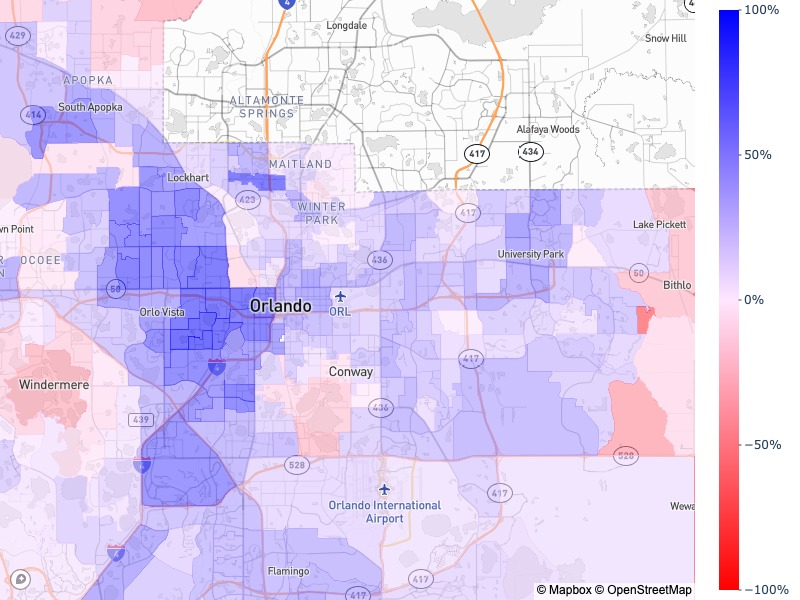

In [30]:
data = go.Choroplethmapbox(
    geojson=precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    z=precincts_2016_2020["margin_frac_twoway_dem_2020"],
    zmin=-1,
    zmax=1,
    marker_line_width=0,
    colorbar=dict(thickness=20, ticklen=3, tickformat='%',outlinewidth=0),
    colorscale=[(0,"red"), (0.5, "rgb(255, 230, 255)"), (1,"blue")],
    marker_opacity=0.6
)

fig = go.Figure(data)

fig.update_layout(
    mapbox_style="mapbox://styles/grisaitis/ckhb6ai8509e719pcec3r5nh6",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=10,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},
    autosize=True,
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show(renderer='jpg', width=800, height=600)

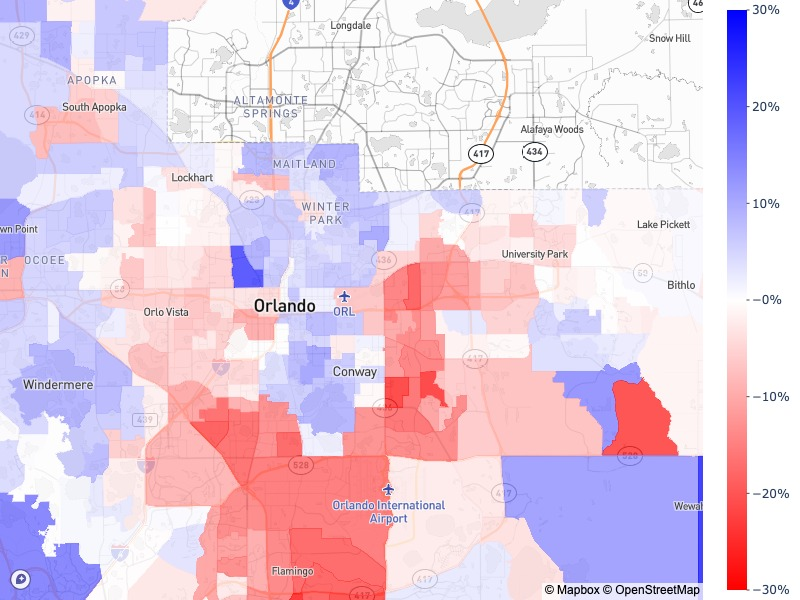

In [31]:
data = go.Choroplethmapbox(
    geojson=precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
    locations=precincts_2016_2020.index,
    z=precincts_2016_2020["margin_frac_twoway_dem_shift"],
    zmin=-0.30,
    zmax=0.30,
    marker_line_width=0,
    colorbar=dict(thickness=20, ticklen=3, tickformat='%',outlinewidth=0),
    colorscale=[
        (0, "red"),
#         (0.40, "rgb(255, 200, 200)"),
        (0.5, "white"),
#         (0.60, "rgb(200, 200, 255)"),
        (1, "blue")],
    marker_opacity=0.8,
    name="precincts",
)

fig = go.Figure(data)

fig.update_layout(
    mapbox_style="mapbox://styles/grisaitis/ckhb6ai8509e719pcec3r5nh6",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=10,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},
    autosize=True,
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show(renderer='jpg', width=800, height=600)

In [32]:
# fig.write_image(file="./choropleth-margin_frac_twoway_dem_shift.jpg", width=1920, height=1200)

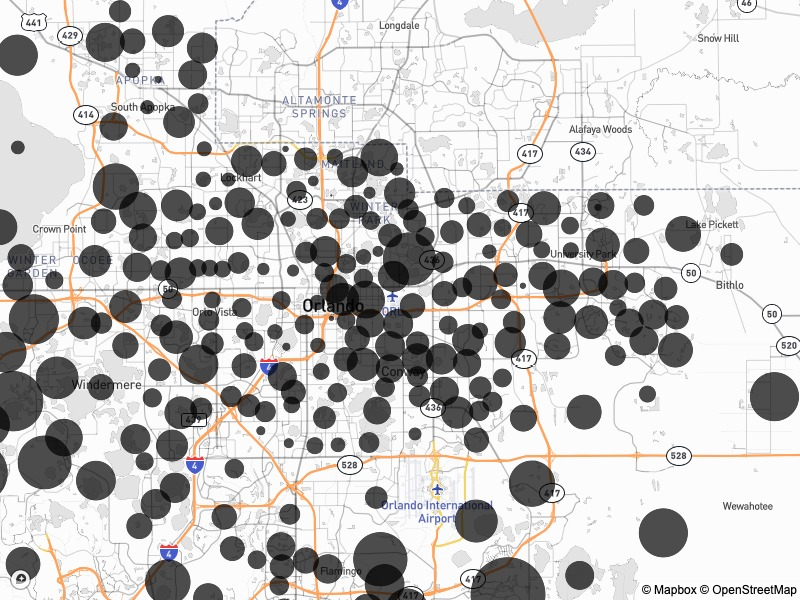

In [33]:
data = go.Scattermapbox(
    lat=precincts_2016_2020.set_geometry('centroid').geometry.y,
    lon=precincts_2016_2020.set_geometry('centroid').geometry.x,
    mode="markers",
    marker_size=precincts_2016_2020["votes_all_2020"] / 100,
    marker_color="black",
    text=precincts_2016_2020.index
)

fig = go.Figure(data)

fig.update_layout(
    mapbox_style="mapbox://styles/grisaitis/ckhb6ai8509e719pcec3r5nh6",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=10,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},
    autosize=True,
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show(renderer='jpg', width=800, height=600)

In [34]:
# fig.write_image("./out.jpg", width=1920, height=1200)

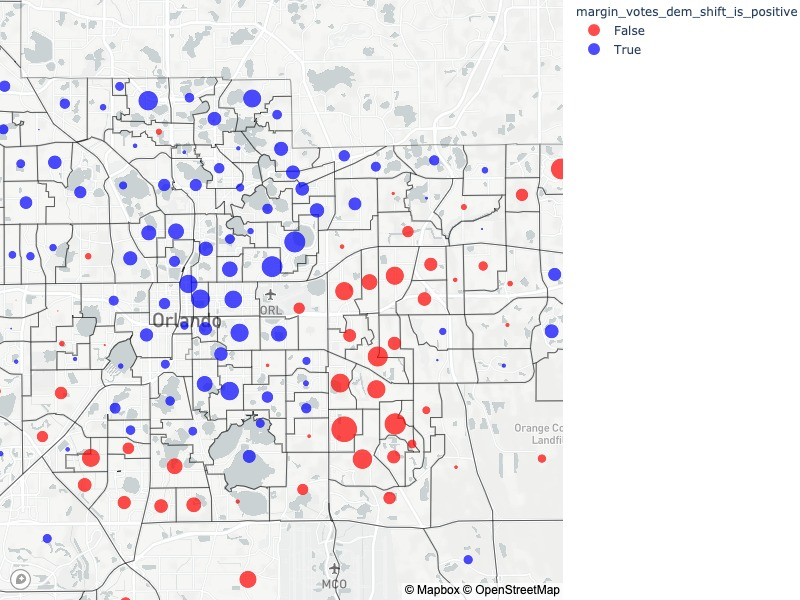

In [35]:
# px.set_mapbox_access_token(MAPBOX_ACCESSTOKEN)

'''
data = go.Scattermapbox(
    lat=precincts_2016_2020.set_geometry('centroid').geometry.y,
    lon=precincts_2016_2020.set_geometry('centroid').geometry.x,
    mode="markers",
    marker_size=precincts_2016_2020["margin_votes_abs_shift"],
    marker_color="gray",
    text=precincts_2016_2020.index
)
fig = go.Figure(data)
'''

fig = px.scatter_mapbox(
    precincts_2016_2020,
    lat="centroid_lat",
    lon="centroid_lon",
    color="margin_votes_dem_shift_is_positive",
    size="margin_votes_abs_shift",
    color_discrete_sequence=["red", "blue"],
    zoom=10,
    opacity=0.7,
)

fig.update_layout(
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "geojson",
        "source": precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
        "opacity": 0.4,
        "type": "line",
        "line": {"width": 1},
        "color": 'black'}],
    mapbox_style="light",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=10.5,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},  # ORL airport
    autosize=True,
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show(renderer='jpg', width=800, height=600)

In [36]:
# fig.write_image("./out.jpg", width=1920, height=1200)

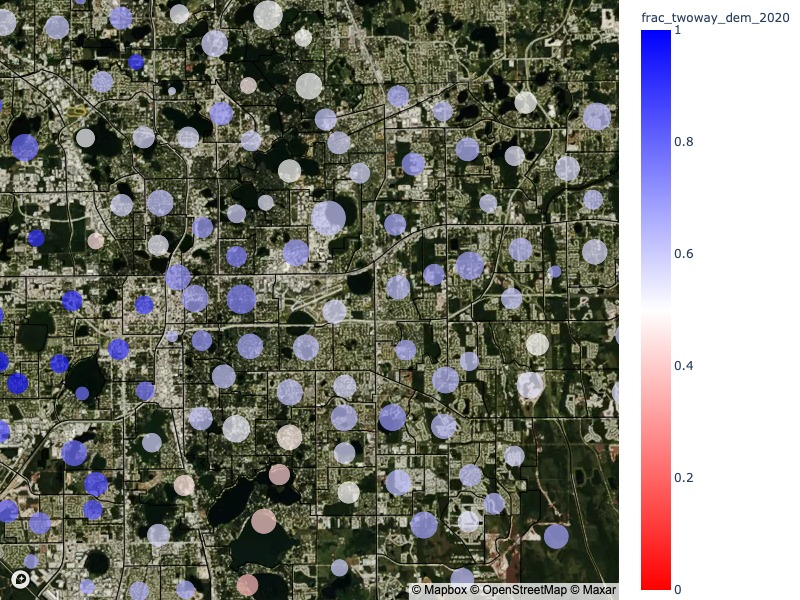

In [37]:
fig = px.scatter_mapbox(
    precincts_2016_2020,
    lat="centroid_lat",
    lon="centroid_lon",
    color="frac_twoway_dem_2020",
    size="votes_all_2020",
    zoom=11,
    opacity=0.7,
    color_continuous_scale=[(0,"red"), (0.5, "white"), (1,"blue")],
    range_color=[0, 1],
    size_max=30,
)

fig.update_layout(
    mapbox_layers=[{
        "below": 'traces',
        "sourcetype": "geojson",
        "source": precincts_2016_2020["geometry"].to_crs(epsg=4326).__geo_interface__,
        "opacity": 0.7,
        "type": "line",
        "line": {"width": 1},
        "color": 'black'}],
    mapbox_style="satellite",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=11,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},  # ORL airport
    autosize=True,
#     height=1000,
    margin={"r":0,"t":0,"l":0,"b":0}
)

fig.show(renderer='jpg', width=800, height=600)

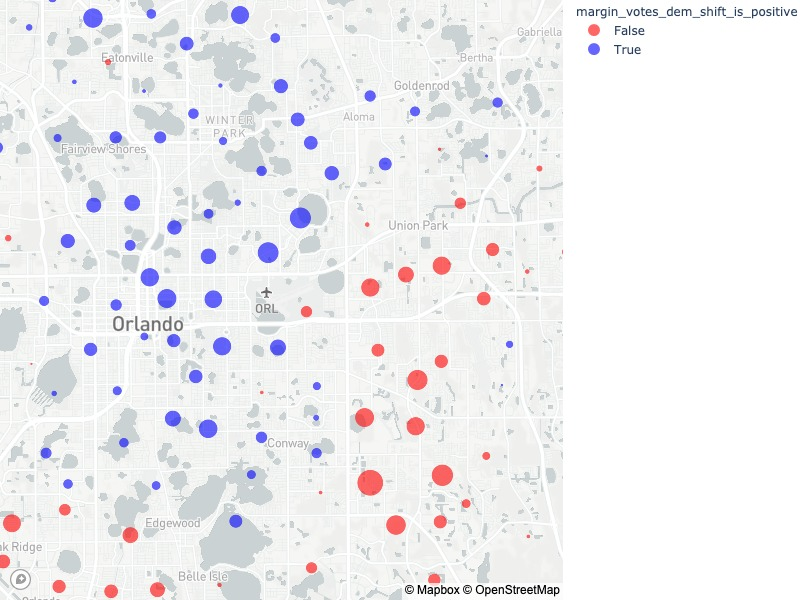

In [38]:
# px.set_mapbox_access_token(MAPBOX_ACCESSTOKEN)

fig = px.scatter_mapbox(
    precincts_2016_2020,
    lat="centroid_lat",
    lon="centroid_lon",
    color="margin_votes_dem_shift_is_positive",
    size="margin_votes_abs_shift",
    color_discrete_sequence=["red", "blue"],
    zoom=11,
    opacity=0.6,
)

fig.update_layout(
    mapbox_style="light",
    mapbox_accesstoken=MAPBOX_ACCESSTOKEN,
    mapbox_zoom=11,
    mapbox_center = {"lat": 28.545556, "lon": -81.333056},  # ORL airport
    autosize=True,
    height=1000,
    margin={"r":0,"t":0,"l":0,"b":0},
)

fig.show(renderer='jpg', width=800, height=600)

In [39]:
# fig.write_image("out.jpg", width=1920, height=1200)